In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from lazypredict.Supervised import LazyRegressor

In [43]:
#  Load data 
df = pd.read_csv(r".\resources\energydata_avg.csv")

df.head()

,date,appliances,lights,avg_temp,avg_humidity,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,60,30,17.17,50.91,6.60,733.50,92.00,7.00,63.00,5.30
1,2016-01-11 17:10:00,60,30,17.15,50.83,6.48,733.60,92.00,6.67,59.17,5.20
2,2016-01-11 17:20:00,50,30,17.10,50.63,6.37,733.70,92.00,6.33,55.33,5.10
3,2016-01-11 17:30:00,50,40,17.07,50.57,6.25,733.80,92.00,6.00,51.50,5.00
4,2016-01-11 17:40:00,60,40,17.07,50.73,6.13,733.90,92.00,5.67,47.67,4.90


In [44]:
# Drop date column - it's not needed for prediction
df.drop('date', axis=1, inplace=True)

In [45]:
# Check for missing values
df.isnull().sum()

appliances      0
lights          0
avg_temp        0
avg_humidity    0
t_out           0
press_mm_hg     0
rh_out          0
windspeed       0
visibility      0
tdewpoint       0
dtype: int64

In [46]:
# Renaming columns
df = df.rename(columns={
    'appliances': 'Appliances',
    'lights': 'Lights',
    't_out': 'Outside_Temp',
    'press_mm_hg': 'Atmospheric_Pressure',
    'rh_out': 'Outside_Humidity',
    'windspeed' : 'Windspeed',
    'visibility' : 'Visibility',
    'tdewpoint' : 'Dewpoint'    

})


# Display the first few rows
df.head()

,Appliances,Lights,avg_temp,avg_humidity,Outside_Temp,Atmospheric_Pressure,Outside_Humidity,Windspeed,Visibility,Dewpoint
0,60,30,17.17,50.91,6.60,733.50,92.00,7.00,63.00,5.30
1,60,30,17.15,50.83,6.48,733.60,92.00,6.67,59.17,5.20
2,50,30,17.10,50.63,6.37,733.70,92.00,6.33,55.33,5.10
3,50,40,17.07,50.57,6.25,733.80,92.00,6.00,51.50,5.00
4,60,40,17.07,50.73,6.13,733.90,92.00,5.67,47.67,4.90


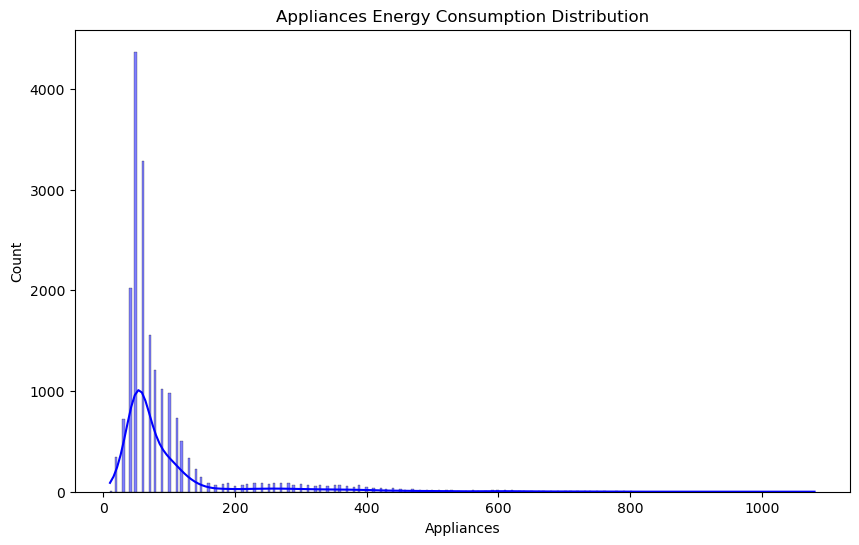

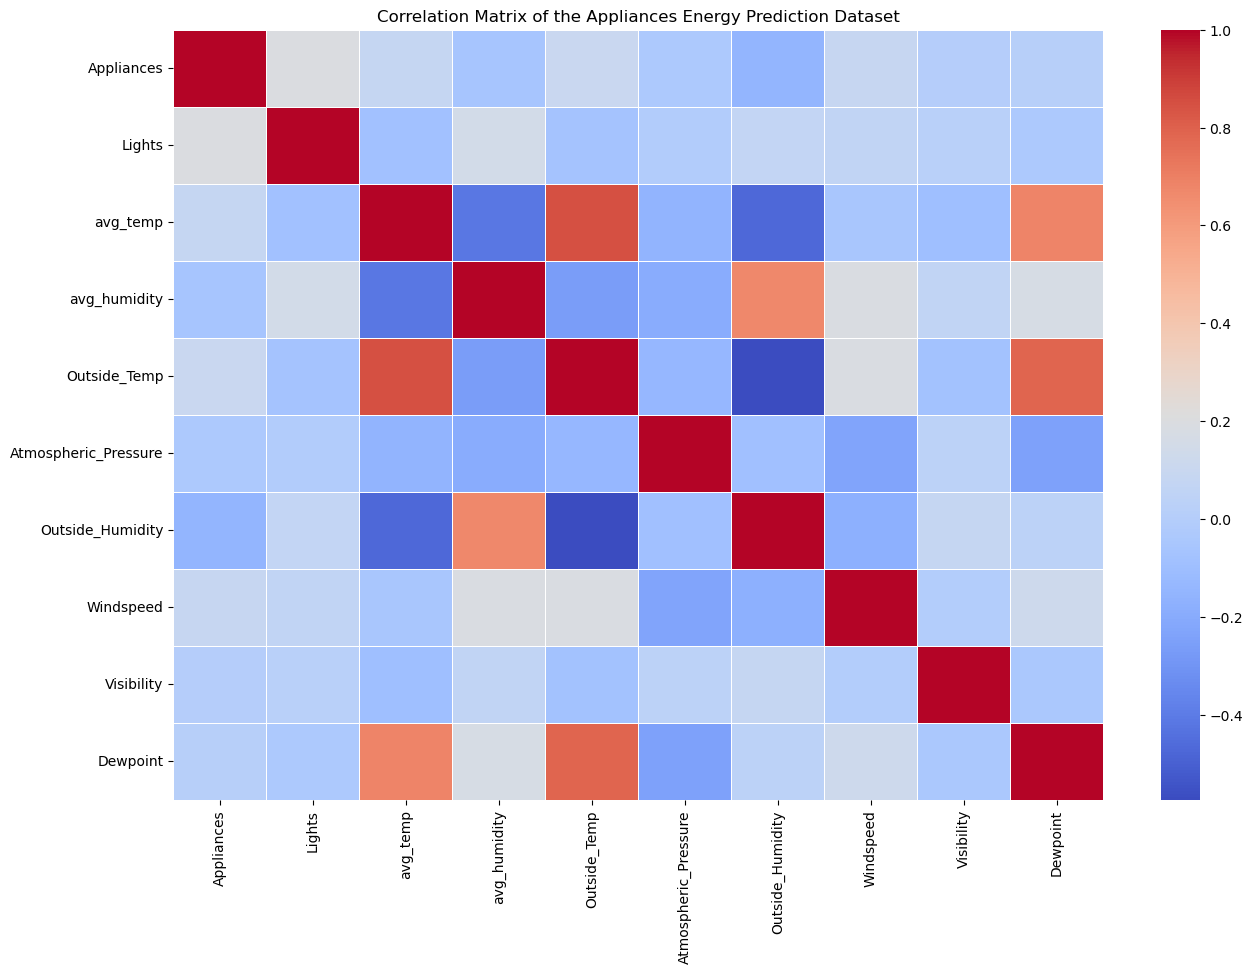

In [47]:

# Visualize the distribution of the target variable (Appliances energy consumption)
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], kde=True, color='blue')
plt.title('Appliances Energy Consumption Distribution')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the Appliances Energy Prediction Dataset')
plt.show()

# Use Plotly for an interactive scatter plot between Temperature and Energy Consumption
fig = px.scatter(df, x='avg_temp', y='Appliances', trendline='ols',
                 trendline_color_override="green",
                 title='Temperature vs. Appliances Energy Consumption')

fig.update_layout(xaxis_title='Average Room Temperature (C)', yaxis_title='Appliances Energy Consumption (Wh)')


fig.show()


In [48]:
#  Split data into features and target variable
X = df.drop(['Appliances', 'Lights'], axis=1)  
y = df['Appliances']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [49]:
# Create a Lazy Regressor and fit the data
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_lp, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance
print(models_lp)

100%|██████████| 42/42 [04:39<00:00,  6.64s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 8
[LightGBM] [Info] Start training from score 97.991513
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.64       0.64   60.49   
RandomForestRegressor                        0.56       0.57   66.41   
BaggingRegressor                             0.52       0.52   70.00   
XGBRegressor                                 0.46       0.46   73.97   
KNeighborsRegressor                          0.45       0.45   74.82   
LGBMRegressor                                0.34       0.34   81.63   
HistGradientBoostingRegressor                0.32       0.33   82.73   
ExtraTreeR

In [39]:
# Initialize a RandomForestRegressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
et_model.fit(X_train, y_train)

# Make predictions
y_pred = et_model.predict(X_test)


Mean Squared Error: 3654.10
Root Mean Squared Error: 60.45
R-squared: 0.64


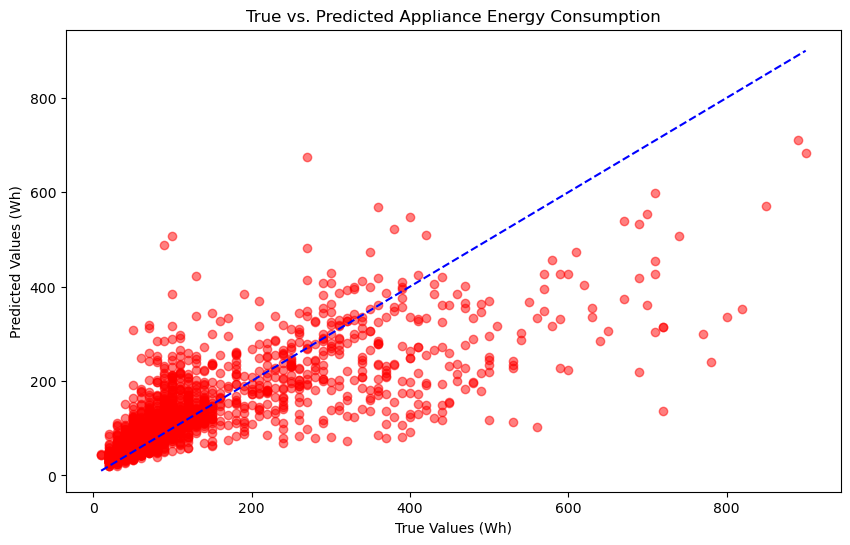

In [40]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--b')
plt.xlabel('True Values (Wh)')
plt.ylabel('Predicted Values (Wh)')
plt.title('True vs. Predicted Appliance Energy Consumption')
plt.show()


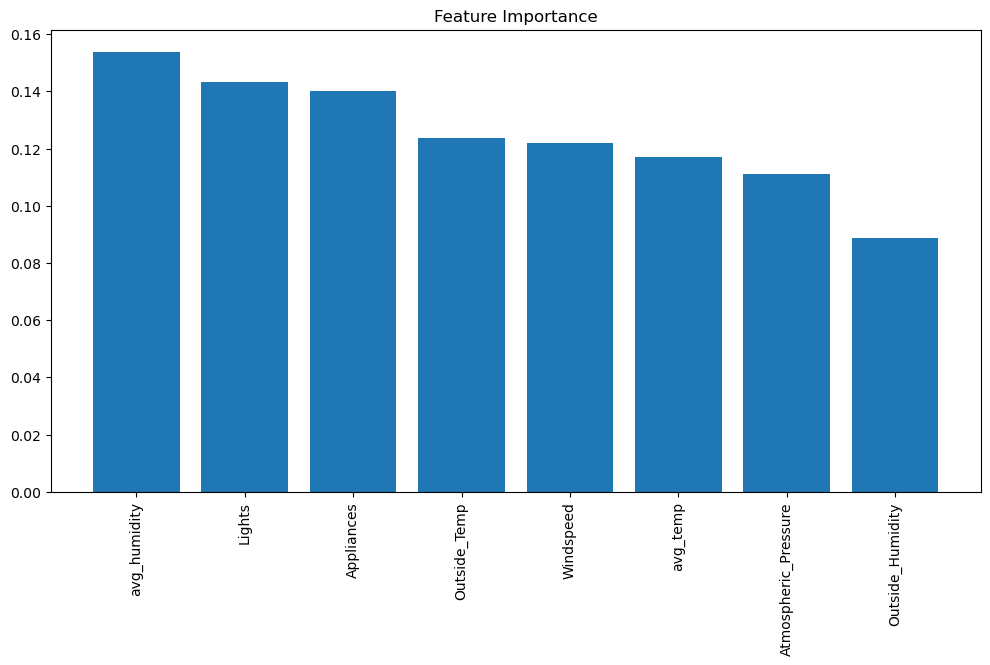

In [41]:
# Get feature importances from the model
importances = et_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [df.columns[i] for i in indices], rotation=90)
plt.show()
